In [1]:
%env CUDA_VISIBLE_DEVICES=1

env: CUDA_VISIBLE_DEVICES=1


In [8]:
%run -n ../model_debugging_utils.py

<Figure size 640x480 with 0 Axes>

In [9]:
pgv = PhraseGroundingVisualizer(
    text_embedding_model_name='microsoft/BiomedVLP-CXR-BERT-specialized',
    text_embedding_model_checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231018_230637_MIMIC-CXR(triplets+classif+entcont+nli+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)",
    phrase_grounder_checkpoint_folder_path="/mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_141052_chst-img-anat_PhraseGrounder(yolov8l,128,256)",
)

Overriding model.yaml nc=80 with nc=36

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.Conv                  [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.Conv                  [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.C2f                   [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.Conv                  [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.C2f                   [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.Conv                  [256, 512, 3, 2]              


device =  GPU
Load phrase grounder
metadata loaded from /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_141052_chst-img-anat_PhraseGrounder(yolov8l,128,256)/metadata.json
MultiPurposeVisualModule()
  Initializing raw_image_encoder: yolov8
  num_bbox_classes: 36


  6                  -1  6   8396800  ultralytics.nn.modules.C2f                   [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics.nn.modules.Conv                  [512, 512, 3, 2]              
  8                  -1  3   4461568  ultralytics.nn.modules.C2f                   [512, 512, 3, True]           
  9                  -1  1    656896  ultralytics.nn.modules.SPPF                  [512, 512, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.Concat                [1]                           
 12                  -1  3   4723712  ultralytics.nn.modules.C2f                   [1024, 512, 3]                
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.Concat                [1]  

  self.global_feat_size = 1024
  self.local_feat_size = 512
  Initializing auxiliary tasks
Load model weights
checkpoint_names = ['checkpoint_68_chestimgbbiou+phrase_acc+segmask_iou=0.8356.pt']
model_checkpoint_path =  /mnt/data/pamessina/workspaces/medvqa-workspace/models/phrase_grounding/20231122_141052_chst-img-anat_PhraseGrounder(yolov8l,128,256)/checkpoint_68_chestimgbbiou+phrase_acc+segmask_iou=0.8356.pt
Load text embedding model
checkpoint_names = ['checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9248.pt']
Load image transform
get_image_transform()
  Using bounding box aware transforms
    Returning default transform (no augmentation)


In [15]:
%run -n ../../datasets/chest_imagenome/chest_imagenome_dataset_management.py

<Figure size 640x480 with 0 Axes>

In [5]:
%matplotlib inline

Image path: /mnt/data/mimic-cxr-jpg/images/p10/p10691024/s56730455/81a15853-12d4b772-e6923553-de6fbd05-576a6ab7.jpg
Object: right lung (0.0, 354.0, 1118.0, 1733.0) (valid)
Object: right upper lung zone (0.0, 422.0, 1050.0, 628.0) (valid)
Object: right mid lung zone (0.0, 1050.0, 1105.0, 368.0) (valid)
Object: right lower lung zone (0.0, 1418.0, 1118.0, 669.0) (valid)
Object: right hilar structures (450.0, 968.0, 668.0, 519.0) (valid)
Object: right apical zone (177.0, 354.0, 873.0, 587.0) (valid)
Object: right costophrenic angle (0.0, 1869.0, 0.0, 423.0) (invalid)
Object: right cardiophrenic angle (450.0, 1691.0, 286.0, 287.0) (valid)
Object: right hemidiaphragm (0.0, 1841.0, 1118.0, 382.0) (valid)
Object: left lung (1364.0, 354.0, 1180.0, 1733.0) (valid)
Object: left upper lung zone (1432.0, 422.0, 1078.0, 628.0) (valid)
Object: left mid lung zone (1377.0, 1050.0, 1167.0, 368.0) (valid)
Object: left lower lung zone (1364.0, 1418.0, 1180.0, 669.0) (valid)
Object: left hilar structures (

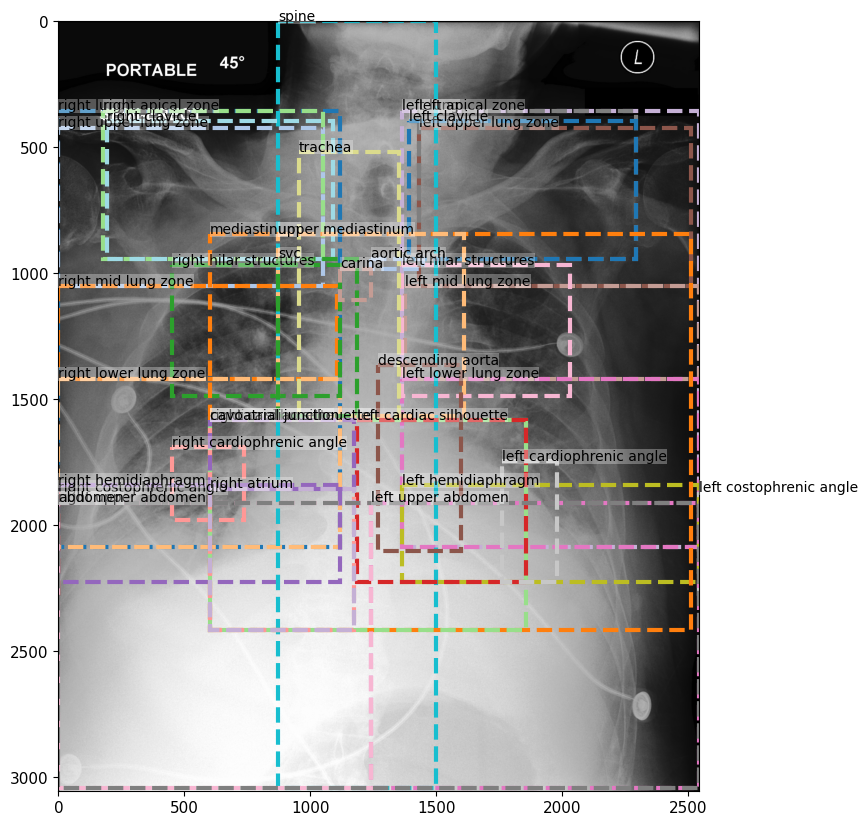

In [16]:
visualize_ground_truth_bounding_boxes('81a15853-12d4b772-e6923553-de6fbd05-576a6ab7', apply_clamping=True)

image_path = /mnt/data/mimic-cxr-jpg/images/p10/p10691024/s56730455/81a15853-12d4b772-e6923553-de6fbd05-576a6ab7.jpg
image.shape = torch.Size([3, 416, 416])
image_size_before = (3056, 2544)
image_size_after = (416, 416)
Obtain text embeddings


100%|██████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 18396.07it/s]


Computing embeddings for 1 new texts


Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


checkpoint_names = ['checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9248.pt']
Loading model weights from /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231018_230637_MIMIC-CXR(triplets+classif+entcont+nli+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9248.pt
Examples of keys in loaded state dict but not in model:
  nli_classifier.bias
  nli_classifier.weight
  fact_decoder.decoder.layers.0.linear1.weight
  fact_decoder.decoder.layers.0.linear2.bias
  fact_decoder.decoder.layers.0.self_attn.out_proj.weight
  fact_decoder.pos_encoder.pe
  fact_decoder.decoder.layers.0.multihead_attn.out_proj.weight
  nli_hidden_layer.weight
  fact_decoder.decoder.layers.0.norm1.weight
  health_status_classifier.bias


Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 2478.90it/s]


text_embeddings.shape = (7, 128)
Run phrase grounder in inference mode
image.shape = torch.Size([3, 416, 416])
output.keys() = dict_keys(['local_feat', 'yolov8_features', 'yolov8_predictions', 'sigmoid_attention', 'phrase_classifier_output'])
pred_coords.shape = (32, 4)
pred_classes.shape = (32,)
sigmoid_attention.shape = (7, 13, 13)
Visualize bbox predictions


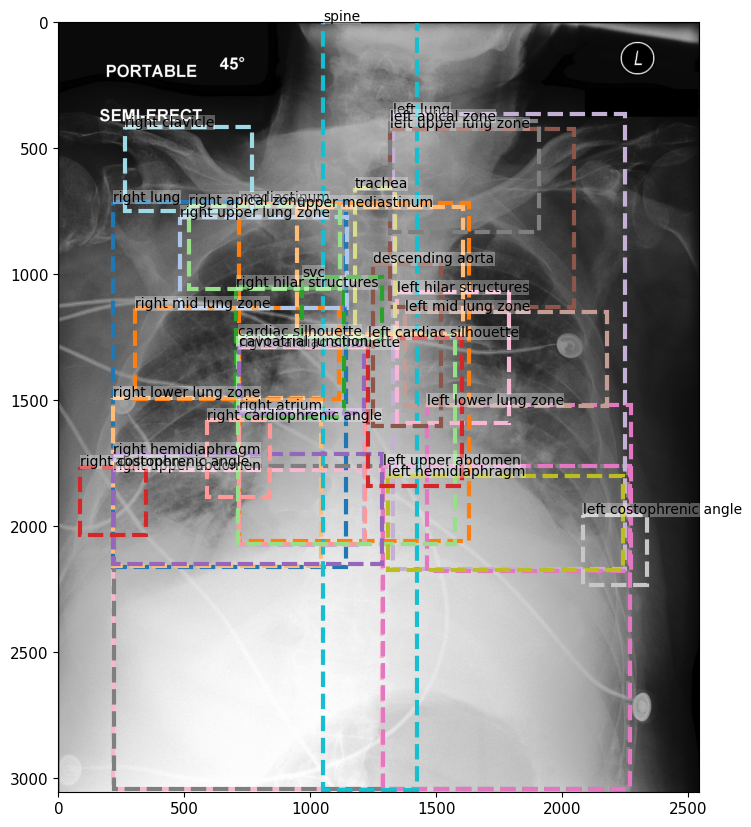

Visualize attention maps


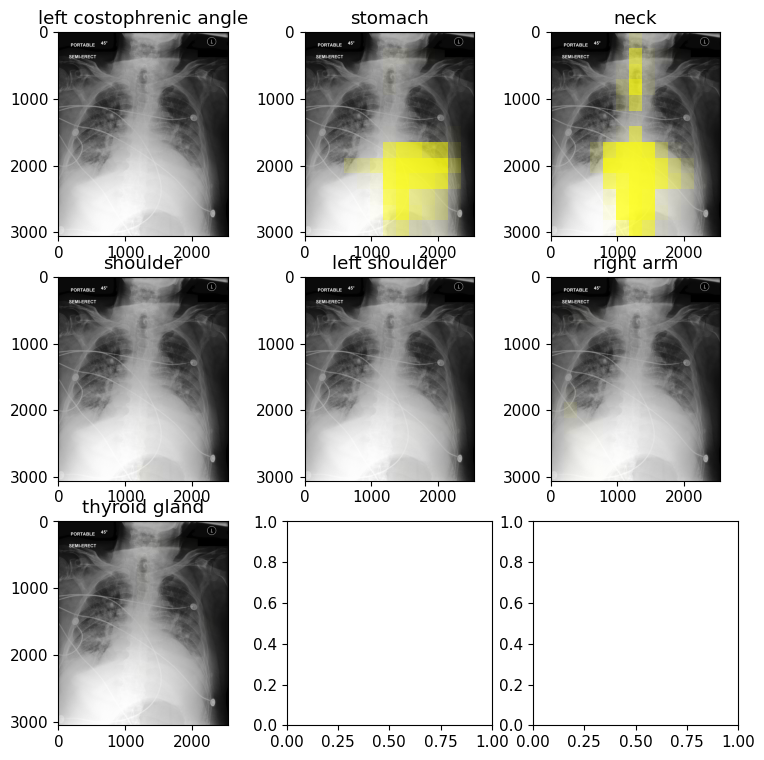

In [28]:
pgv.visualize_phrase_grounding(
#     phrases=['right lung', 'left lung', 'right clavicle', 'left clavicle', 'spine', 'cardiac silhouette',
#              'right upper lung zone', 'right mid lung zone', 'right lower lung zone',
#              'left upper lung zone', 'left mid lung zone', 'left lower lung zone',
#             'right costophrenic angle', 'left costophrenic angle', 'stomach', 'neck', 'shoulder'],
    phrases=['left costophrenic angle', 'stomach', 'neck', 'shoulder', 'left shoulder', 'right arm', 'thyroid gland'],
    image_path='/mnt/data/mimic-cxr-jpg/images/p10/p10691024/s56730455/81a15853-12d4b772-e6923553-de6fbd05-576a6ab7.jpg',
    attention_factor=0.8,
)

Image path: /mnt/data/mimic-cxr-jpg/images/p19/p19557250/s52948320/7d005ee4-1ea303be-37d1884d-42fa218a-0dfbf19d.jpg
Object: right lung (245.0, 408.0, 1280.0, 1852.0) (valid)
Object: right upper lung zone (571.0, 449.0, 954.0, 613.0) (valid)
Object: right mid lung zone (408.0, 1062.0, 1008.0, 435.0) (valid)
Object: right lower lung zone (245.0, 1497.0, 1116.0, 763.0) (valid)
Object: right hilar structures (912.0, 966.0, 558.0, 613.0) (valid)
Object: right apical zone (844.0, 408.0, 681.0, 313.0) (valid)
Object: right costophrenic angle (108.0, 2056.0, 273.0, 272.0) (valid)
Object: right cardiophrenic angle (1034.0, 1729.0, 205.0, 381.0) (valid)
Object: right hemidiaphragm (245.0, 1838.0, 1375.0, 422.0) (valid)
Object: left lung (1661.0, 326.0, 1211.0, 1743.0) (valid)
Object: left upper lung zone (1674.0, 381.0, 776.0, 681.0) (valid)
Object: left mid lung zone (1674.0, 1062.0, 967.0, 367.0) (valid)
Object: left lower lung zone (1661.0, 1429.0, 1211.0, 640.0) (valid)
Object: left hilar st

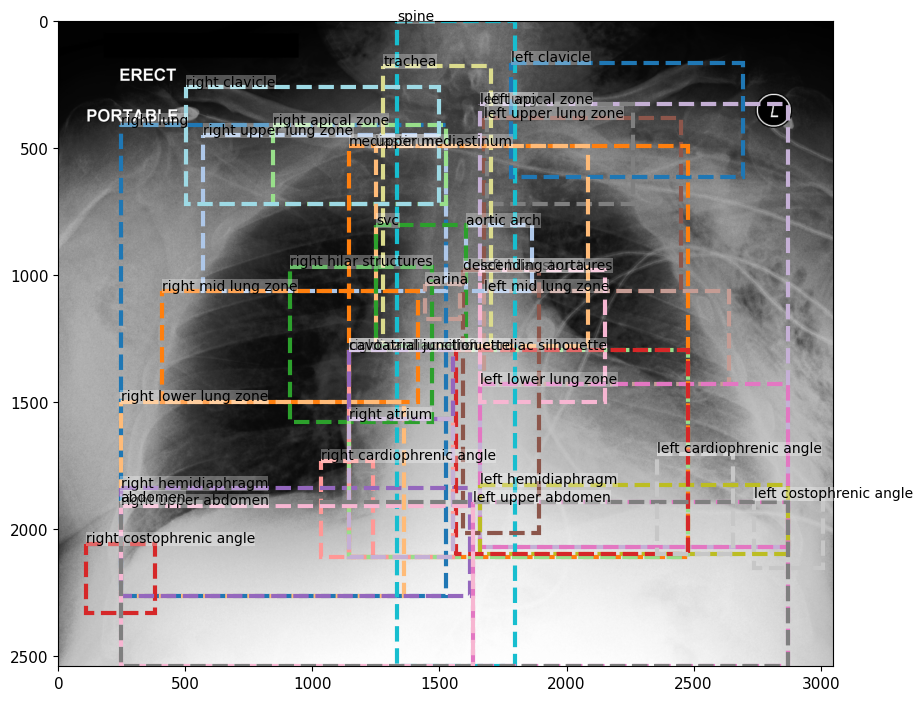

In [18]:
visualize_ground_truth_bounding_boxes('7d005ee4-1ea303be-37d1884d-42fa218a-0dfbf19d', apply_clamping=True)

image_path = /mnt/data/mimic-cxr-jpg/images/p19/p19557250/s52948320/7d005ee4-1ea303be-37d1884d-42fa218a-0dfbf19d.jpg
image.shape = torch.Size([3, 416, 416])
image_size_before = (2539, 3050)
image_size_after = (416, 416)
Obtain text embeddings


100%|████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 38860.14it/s]


text_embeddings.shape = (15, 128)
Run phrase grounder in inference mode
image.shape = torch.Size([3, 416, 416])
output.keys() = dict_keys(['local_feat', 'yolov8_features', 'yolov8_predictions', 'sigmoid_attention', 'phrase_classifier_output'])
pred_coords.shape = (35, 4)
pred_classes.shape = (35,)
sigmoid_attention.shape = (15, 13, 13)
Visualize bbox predictions


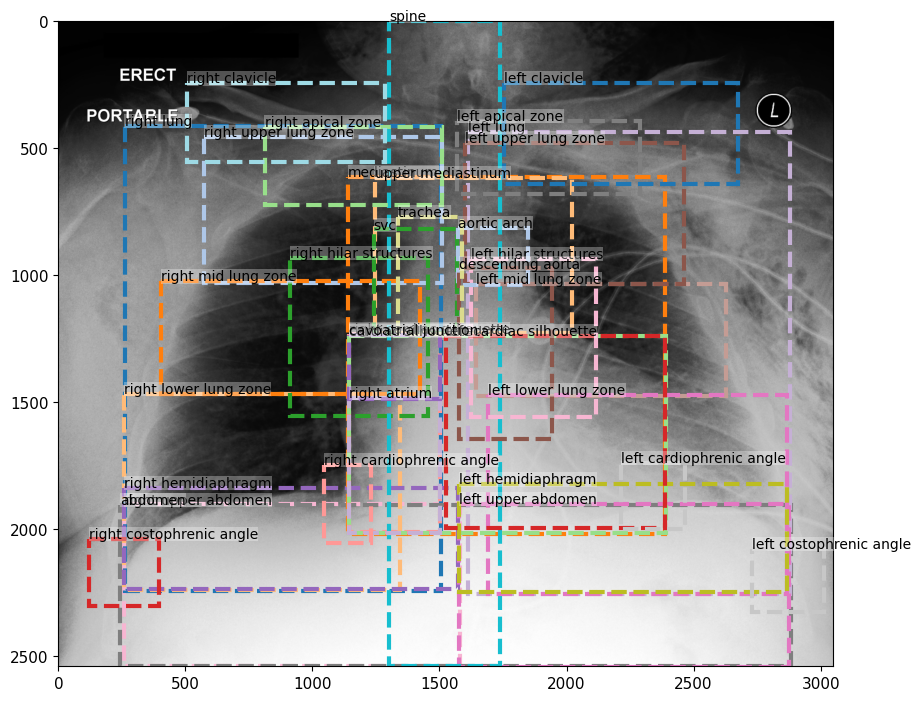

Visualize attention maps


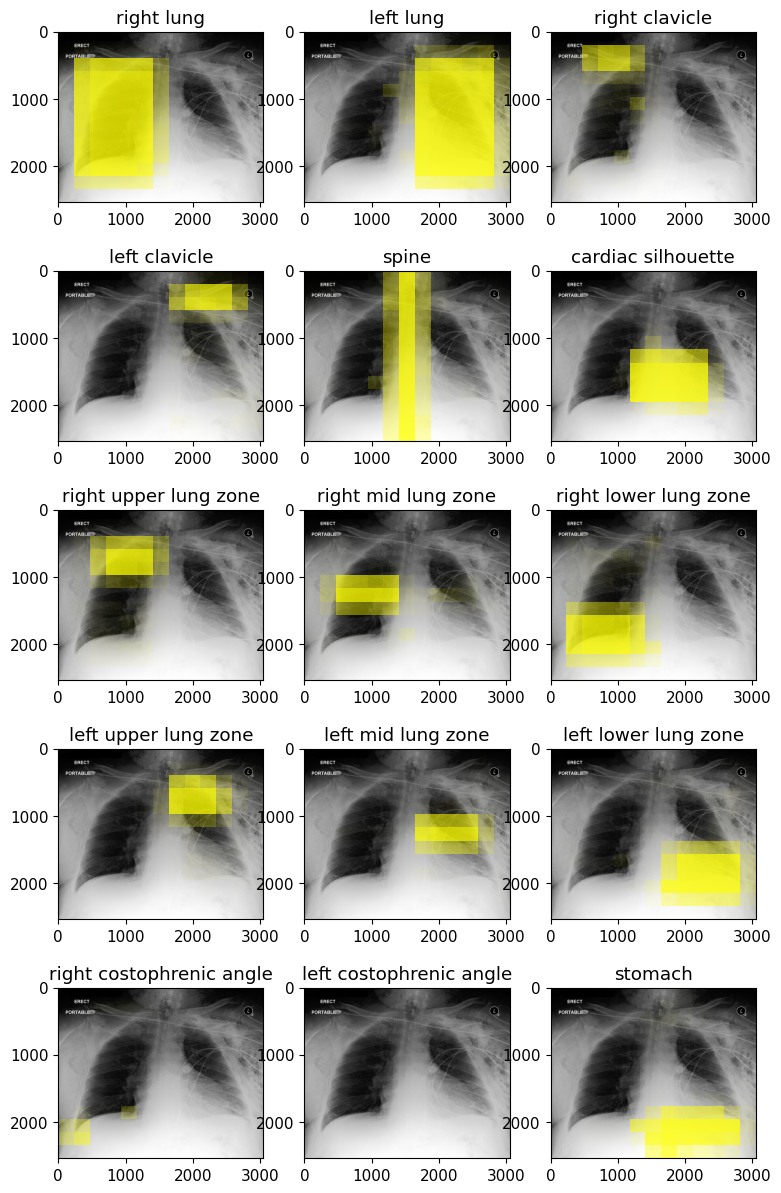

In [14]:
pgv.visualize_phrase_grounding(
    phrases=['right lung', 'left lung', 'right clavicle', 'left clavicle', 'spine', 'cardiac silhouette',
             'right upper lung zone', 'right mid lung zone', 'right lower lung zone',
             'left upper lung zone', 'left mid lung zone', 'left lower lung zone',
            'right costophrenic angle', 'left costophrenic angle', 'stomach'],
    image_path='/mnt/data/mimic-cxr-jpg/images/p19/p19557250/s52948320/7d005ee4-1ea303be-37d1884d-42fa218a-0dfbf19d.jpg',
    attention_factor=0.8,
)

Image path: /mnt/data/mimic-cxr-jpg/images/p18/p18754359/s55148324/ac89edde-23a47cb6-8854c089-7cc684a4-967af403.jpg
Object: right lung (286.0, 300.0, 846.0, 1432.0) (valid)
Object: right upper lung zone (300.0, 341.0, 736.0, 586.0) (valid)
Object: right mid lung zone (286.0, 927.0, 750.0, 287.0) (valid)
Object: right lower lung zone (286.0, 1214.0, 846.0, 518.0) (valid)
Object: right hilar structures (654.0, 859.0, 423.0, 409.0) (valid)
Object: right apical zone (395.0, 300.0, 628.0, 300.0) (valid)
Object: right costophrenic angle (150.0, 1541.0, 272.0, 273.0) (valid)
Object: right cardiophrenic angle (804.0, 1377.0, 178.0, 451.0) (valid)
Object: right hemidiaphragm (286.0, 1473.0, 1023.0, 259.0) (valid)
Object: left lung (1173.0, 272.0, 955.0, 1365.0) (valid)
Object: left upper lung zone (1173.0, 313.0, 777.0, 614.0) (valid)
Object: left mid lung zone (1214.0, 927.0, 832.0, 259.0) (valid)
Object: left lower lung zone (1255.0, 1186.0, 873.0, 451.0) (valid)
Object: left hilar structures

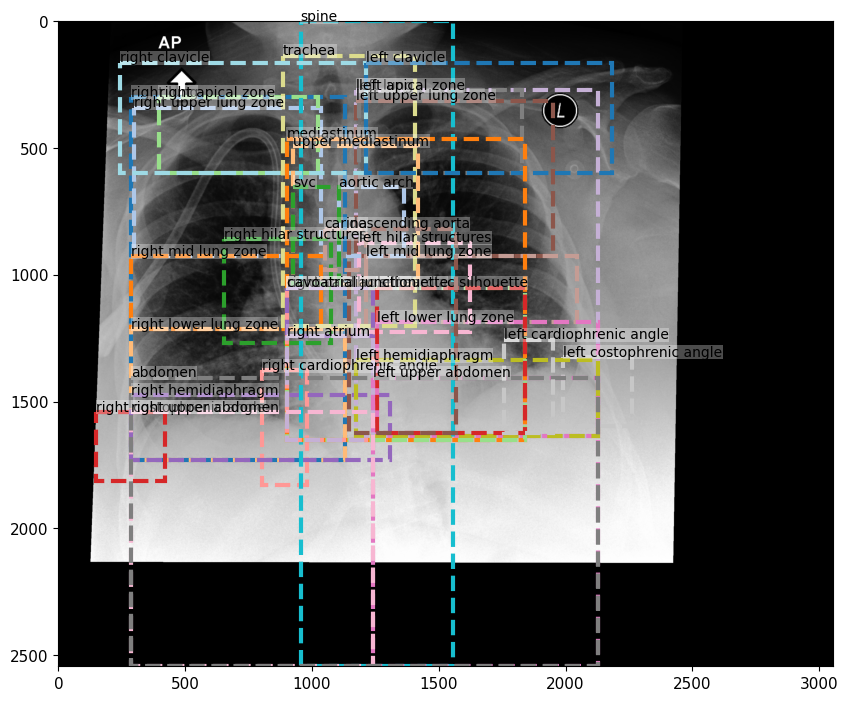

In [19]:
visualize_ground_truth_bounding_boxes(apply_clamping=True)

image_path = /mnt/data/mimic-cxr-jpg/images/p18/p18754359/s55148324/ac89edde-23a47cb6-8854c089-7cc684a4-967af403.jpg
image.shape = torch.Size([3, 416, 416])
image_size_before = (2544, 3056)
image_size_after = (416, 416)
Obtain text embeddings


100%|████████████████████████████████████████████████████████████████████████████████| 22/22 [00:00<00:00, 47959.82it/s]


Computing embeddings for 1 new texts


Explicitly passing a `revision` is encouraged when loading a configuration with custom code to ensure no malicious code has been contributed in a newer revision.
Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.


checkpoint_names = ['checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9248.pt']
Loading model weights from /mnt/data/pamessina/workspaces/medvqa-workspace/models/fact_embedding/20231018_230637_MIMIC-CXR(triplets+classif+entcont+nli+autoencoder)_FactEncoder(microsoft-BiomedVLP-CXR-BERT-specialized)/checkpoint_91_cacc+chf1+chf1+cscc+encc+hscc+nlcc+sass+ta0)+ta1)+ta2)+ta0)+ta1)+ta2)+ta3)+ta4)+ta5)+ta6)+ta7)=0.9248.pt
Examples of keys in loaded state dict but not in model:
  fact_decoder_input_layer.bias
  fact_decoder.decoder.layers.0.multihead_attn.out_proj.bias
  comparison_status_classifier.bias
  aux_task_hidden_layer.bias
  fact_decoder.W_vocab.weight
  comparison_status_classifier.weight
  fact_decoder.decoder.layers.0.linear2.bias
  fact_decoder.embedding_table.weight
  category_classifier.weight
  fact_decoder.decoder.layers.0.multihead_attn.out_proj.weight


Explicitly passing a `revision` is encouraged when loading a model with custom code to ensure no malicious code has been contributed in a newer revision.
100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 3771.86it/s]


text_embeddings.shape = (22, 128)
Run phrase grounder in inference mode
image.shape = torch.Size([3, 416, 416])
output.keys() = dict_keys(['local_feat', 'yolov8_features', 'yolov8_predictions', 'sigmoid_attention', 'phrase_classifier_output'])
pred_coords.shape = (36, 4)
pred_classes.shape = (36,)
sigmoid_attention.shape = (22, 13, 13)
Visualize bbox predictions


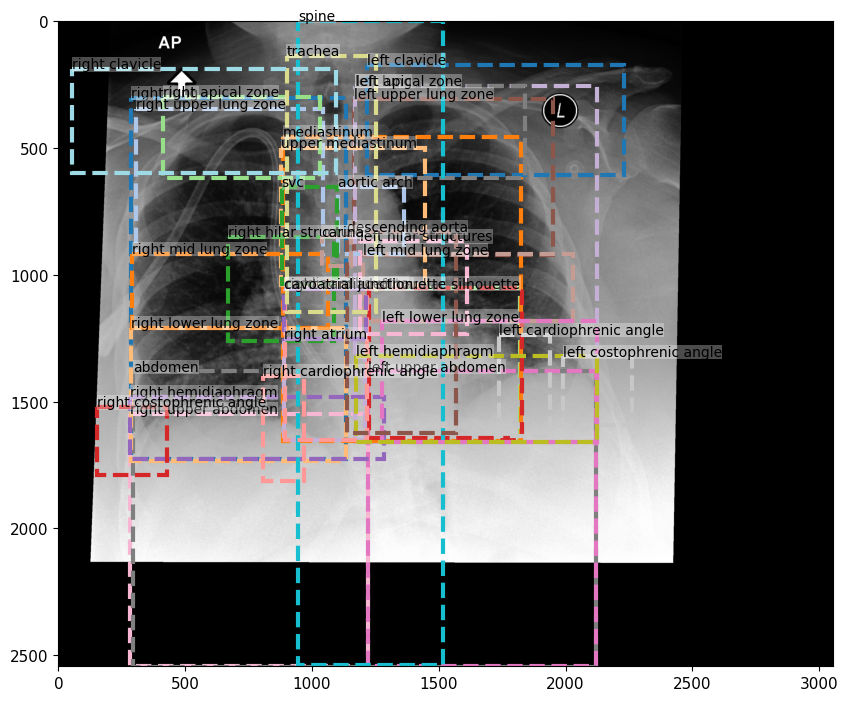

Visualize attention maps


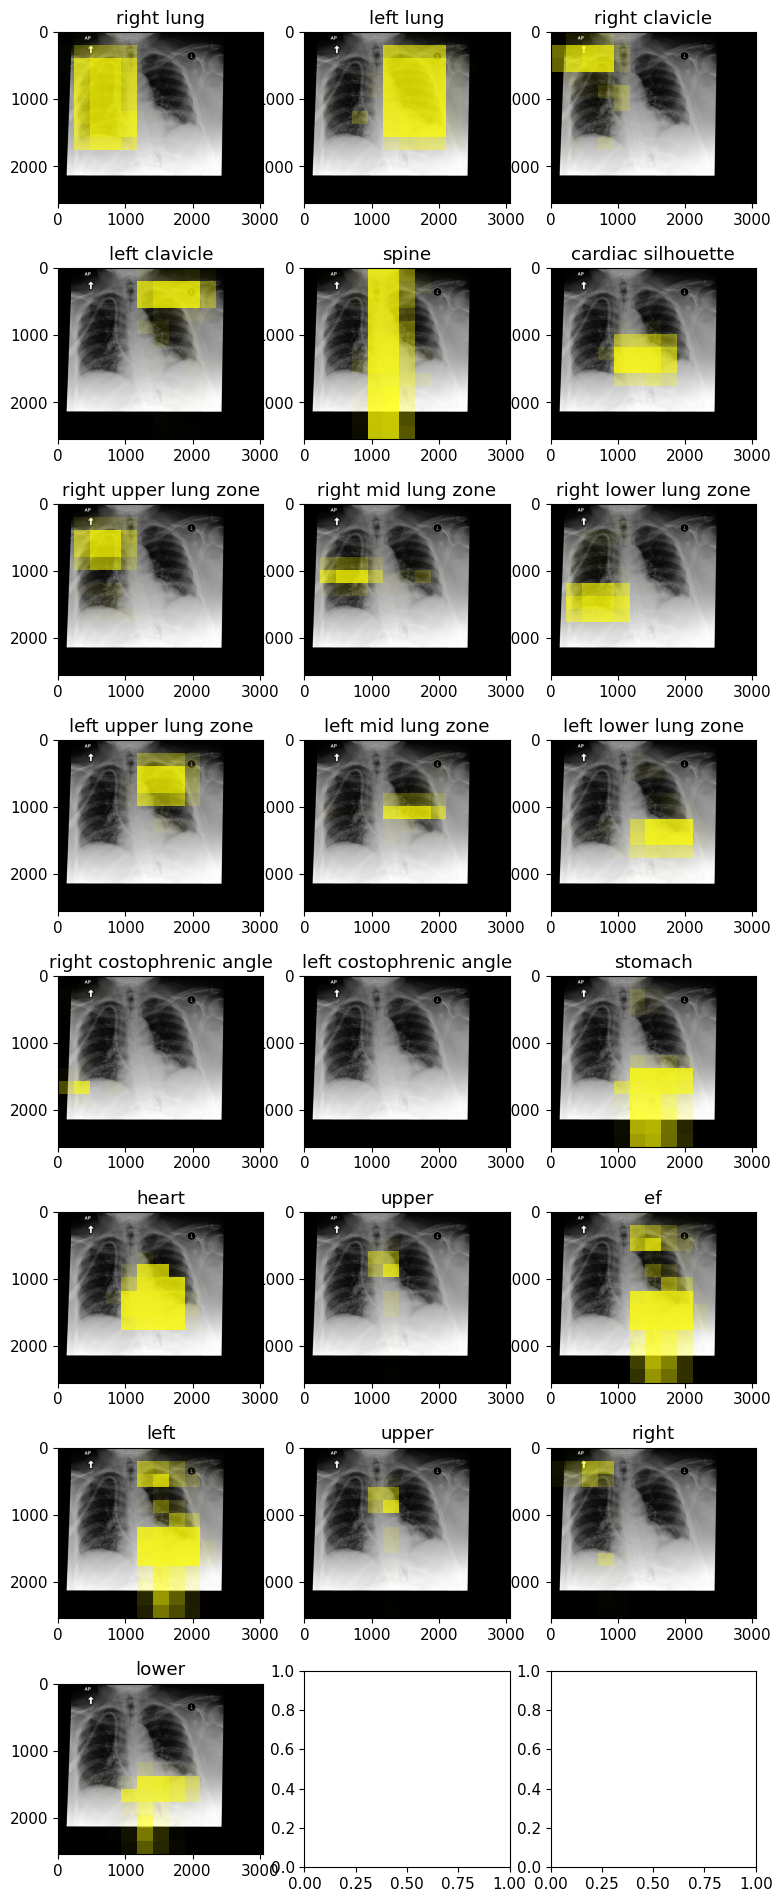

In [24]:
pgv.visualize_phrase_grounding(
    phrases=['right lung', 'left lung', 'right clavicle', 'left clavicle', 'spine', 'cardiac silhouette',
             'right upper lung zone', 'right mid lung zone', 'right lower lung zone',
             'left upper lung zone', 'left mid lung zone', 'left lower lung zone',
            'right costophrenic angle', 'left costophrenic angle', 'stomach', 'heart', 'upper', 'ef',
            'left', 'upper', 'right', 'lower'],
    image_path='/mnt/data/mimic-cxr-jpg/images/p18/p18754359/s55148324/ac89edde-23a47cb6-8854c089-7cc684a4-967af403.jpg',
    attention_factor=0.8,
)